# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Rivaldi
- **Email:** rivalsbr@gmail.com
- **ID Dicoding:** rivalsbr

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang menghasilkan pendapatan tertinggi, dan bagaimana tren pertumbuhan penjualannya dari bulan ke bulan?
- Bagaimana pengaruh ketepatan waktu pengiriman terhadap skor ulasan (review score) yang diberikan oleh pelanggan?

## Import Semua Packages/Library yang Digunakan

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [100]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Tentukan path folder
path = '/content/drive/My Drive/ColabNotebooks/E-Commerce Public Dataset/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
# Memuat data
orders_df = pd.read_csv(path + 'orders_dataset.csv')
order_items_df = pd.read_csv(path + 'order_items_dataset.csv')
products_df = pd.read_csv(path + 'products_dataset.csv')
category_name_df = pd.read_csv(path + 'product_category_name_translation.csv')
order_reviews_df = pd.read_csv(path + 'order_reviews_dataset.csv')

**Insight:**
- Konektivitas Data: Dataset ini bersifat relasional yang tersebar di beberapa tabel terpisah (orders, products, reviews, dll). Proses penggabungan (merging) yang tepat menggunakan kunci unik seperti order_id dan product_id sangat krusial agar tidak kehilangan konteks transaksi.
- Kelengkapan Informasi: Tanpa menggabungkan tabel order_items dengan orders, kita tidak bisa menganalisis aspek waktu (tren bulanan). Hal ini menunjukkan pentingnya memahami skema database sebelum memulai analisis.

### Assessing Data

In [102]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [103]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [104]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [105]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [106]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [107]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [108]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [109]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [110]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [111]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [112]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [113]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [114]:
category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [115]:
category_name_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [116]:
print("Jumlah duplikasi: ", category_name_df.duplicated().sum())

Jumlah duplikasi:  0


In [117]:
category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [118]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [119]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [120]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [121]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- Kualitas Waktu: Ditemukan bahwa kolom tanggal (timestamp) seringkali terbaca sebagai tipe data object. Ini adalah masalah umum yang harus segera diidentifikasi agar fungsi analisis waktu (seperti resampling atau delta days) bisa berjalan.
- Inkonsistensi Kategori: Ditemukan beberapa produk tidak memiliki kategori atau tidak ada terjemahannya, yang menunjukkan perlunya standarisasi label pada sistem input data produk.
- Missing Values pada Logistik: Adanya data kosong pada kolom order_delivered_customer_date memberikan sinyal awal bahwa ada transaksi yang tidak terselesaikan (dibatalkan atau hilang), yang jika tidak ditangani akan mengganggu perhitungan rata-rata lama pengiriman.

### Cleaning Data

In [122]:
# merubah kolom tanggal pada orders_df
datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [123]:
# merubah kolom tanggal pada order_items_df
datetime_columns = ["shipping_limit_date"
]

for column in datetime_columns:
    order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [124]:
# merubah kolom tanggal pada order_reviews_df
datetime_columns = ["review_creation_date", "review_answer_timestamp"
]

for column in datetime_columns:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [125]:
# Drop baris tanpa tanggal sampai ke pelanggan
orders_df.dropna(subset=['order_delivered_customer_date'], inplace=True)

# Imputasi order_approved_at dengan waktu pembelian
orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'], inplace=True)

print("Missing values orders_df:\n", orders_df.isna().sum())

Missing values orders_df:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     1
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


/tmp/ipython-input-1215094866.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'], inplace=True)


In [126]:
# Menghapus missing value products_df

products_df.dropna(inplace=True)

print("Missing values pada products_df:", products_df.isna().sum().sum())

Missing values pada products_df: 0


In [127]:
# Mengisi missing value pada kolom review_comment_title dan review_comment_message dengan "no_comment".

order_reviews_df["review_comment_title"].fillna("no_comment", inplace=True)
order_reviews_df["review_comment_message"].fillna("no_comment", inplace=True)

print("Missing values pada order_reviews_df:\n", order_reviews_df.isna().sum())

Missing values pada order_reviews_df:
 review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


/tmp/ipython-input-2997726981.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df["review_comment_title"].fillna("no_comment", inplace=True)
/tmp/ipython-input-2997726981.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

**Insight:**
- Penanganan Label: Mengisi kategori produk yang hilang dengan label "Unknown" memastikan bahwa total pendapatan (revenue) tetap akurat dan tidak ada uang yang "hilang" dari laporan keuangan hanya karena label yang tidak lengkap.
- Penyederhanaan Kolom: Menghapus kolom spesifikasi teknis (berat, dimensi) yang tidak relevan dengan pertanyaan bisnis terbukti mempercepat proses komputasi dan membuat data lebih mudah dibaca (fokus pada pendapatan dan kepuasan).
- Preservasi Data vs Akurasi: Keputusan untuk menghapus (dropping) baris dengan tanggal pengiriman kosong lebih baik daripada melakukan imputasi, karena menebak tanggal pengiriman akan menciptakan data palsu yang merusak analisis performa logistik.

## Exploratory Data Analysis (EDA)

### Explore ...

In [128]:
# Gabungkan order_items dengan orders
product_sales_df = pd.merge(
    left=order_items_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Gabungkan dengan products
product_sales_df = pd.merge(
    left=product_sales_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

# Gabungkan dengan translation
product_sales_df = pd.merge(
    left=product_sales_df,
    right=category_name_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

# Hapus kolom Portugis dan ganti nama ke English
product_sales_df.drop("product_category_name", axis=1, inplace=True)
product_sales_df.rename(columns={"product_category_name_english": "product_category"}, inplace=True)

product_sales_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-12 16:04:24,2017-05-15,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-14 13:32:39,2018-08-20,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-01 16:42:31,2017-03-17,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [129]:
# Menggabungkan orders dengan reviews
delivery_reviews_df = pd.merge(
    left=orders_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

delivery_reviews_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,no_comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,no_comment,no_comment,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5.0,no_comment,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5.0,no_comment,no_comment,2018-02-17,2018-02-18 13:02:51


In [130]:
print("Check Missing Values - Product Sales:\n", product_sales_df.isna().sum())
print("\nCheck Missing Values - Delivery Reviews:\n", delivery_reviews_df.isna().sum())

Check Missing Values - Product Sales:
 order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                      2454
order_status                     2454
order_purchase_timestamp         2454
order_approved_at                2454
order_delivered_carrier_date     2455
order_delivered_customer_date    2454
order_estimated_delivery_date    2454
product_name_lenght              1604
product_description_lenght       1604
product_photos_qty               1604
product_weight_g                 1604
product_length_cm                1604
product_height_cm                1604
product_width_cm                 1604
product_category                 1628
dtype: int64

Check Missing Values - Delivery Reviews:
 order_id                           0
customer_id                     

In [131]:
# Menghapus kolom yang tidak dipakai
unused_columns = [
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'order_status',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

product_sales_df.drop(columns=unused_columns, inplace=True, errors='ignore')

# Mengisi nama kategori yang hilang dengan "Unknown"
product_sales_df['product_category'].fillna('Unknown', inplace=True)

# Menghapus missing value pada kolom order_purchase_timestamp
product_sales_df.dropna(subset=['order_purchase_timestamp'], inplace=True)

product_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110196 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  110196 non-null  object        
 1   order_item_id             110196 non-null  int64         
 2   product_id                110196 non-null  object        
 3   seller_id                 110196 non-null  object        
 4   shipping_limit_date       110196 non-null  datetime64[ns]
 5   price                     110196 non-null  float64       
 6   freight_value             110196 non-null  float64       
 7   customer_id               110196 non-null  object        
 8   order_purchase_timestamp  110196 non-null  datetime64[ns]
 9   product_category          110196 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 9.2+ MB


/tmp/ipython-input-2667346048.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_sales_df['product_category'].fillna('Unknown', inplace=True)


In [132]:
# Menghapus kolom yang tidak dipakai
unused_review_columns = [
    'review_id',
    'review_comment_title',
    'review_comment_message',
    'review_creation_date',
    'review_answer_timestamp',

]

delivery_reviews_df.drop(columns=unused_review_columns, inplace=True, errors='ignore')

# Menghapus missing values pada kolom review_score
delivery_reviews_df.dropna(subset=['review_score'], inplace=True)

delivery_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96359 entries, 0 to 97004
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96359 non-null  object        
 1   customer_id                    96359 non-null  object        
 2   order_status                   96359 non-null  object        
 3   order_purchase_timestamp       96359 non-null  datetime64[ns]
 4   order_approved_at              96359 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96358 non-null  datetime64[ns]
 6   order_delivered_customer_date  96359 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96359 non-null  datetime64[ns]
 8   review_score                   96359 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 7.4+ MB


In [133]:
# Menghitung total pendapatan per kategori
category_revenue_df = product_sales_df.groupby("product_category").agg({
    "price": "sum"
}).sort_values(by="price", ascending=False).reset_index()

# Menampilkan 5 kategori teratas
print("Top 5 Kategori Produk Berdasarkan Pendapatan:")
print(category_revenue_df.head(5))

Top 5 Kategori Produk Berdasarkan Pendapatan:
        product_category       price
0          health_beauty  1233211.61
1          watches_gifts  1165898.98
2         bed_bath_table  1023434.76
3         sports_leisure   954695.05
4  computers_accessories   888613.62


In [134]:
# Membuat kolom bulan-tahun untuk analisis tren
# Pastikan sudah merge dengan orders_df untuk mendapatkan 'order_purchase_timestamp'
monthly_sales_df = product_sales_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_sales_df.index = monthly_sales_df.index.strftime('%B %Y') # Mengubah format bulan
monthly_sales_df = monthly_sales_df.reset_index()
monthly_sales_df.rename(columns={"order_id": "order_count", "price": "revenue"}, inplace=True)

print(monthly_sales_df.head(10))

/tmp/ipython-input-692237500.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_df = product_sales_df.resample(rule='M', on='order_purchase_timestamp').agg({


  order_purchase_timestamp  order_count    revenue
0           September 2016            1     134.97
1             October 2016          270   40941.30
2            November 2016            0       0.00
3            December 2016            1      10.90
4             January 2017          750  111798.36
5            February 2017         1653  234223.40
6               March 2017         2546  359198.85
7               April 2017         2303  340669.68
8                 May 2017         3545  489159.25
9                June 2017         3135  421923.37


In [135]:
# Menghitung selisih hari antara kenyataan dan estimasi
# Nilai negatif berarti lebih cepat, positif berarti terlambat
delivery_reviews_df['delivery_time_diff'] = (delivery_reviews_df['order_delivered_customer_date'] -
                                            delivery_reviews_df['order_estimated_delivery_date']).dt.days

# Mengkategorikan status pengiriman
delivery_reviews_df['delivery_status'] = delivery_reviews_df['delivery_time_diff'].apply(
    lambda x: "Terlambat" if x > 0 else "Tepat Waktu/Lebih Cepat"
)

In [136]:
# Melihat rata-rata skor ulasan berdasarkan status pengiriman
shipping_impact_df = delivery_reviews_df.groupby("delivery_status").agg({
    "review_score": "mean"
})

print(shipping_impact_df)

                         review_score
delivery_status                      
Tepat Waktu/Lebih Cepat      4.289842
Terlambat                    2.271139


**Insight:**
- Identifikasi Karakteristik Distribusi: Melalui fungsi .describe(), kita menemukan adanya rentang harga yang sangat lebar antar kategori produk. Hal ini memberikan insight bahwa strategi pemasaran harus dibedakan antara kategori luxury (seperti jam tangan/perhiasan) dan kategori kebutuhan harian (bed/bath/table).
- Pola Musiman (Seasonality): Dengan melakukan teknik grouping berdasarkan bulan, EDA mengungkap adanya periode tertentu di mana volume pesanan melonjak drastis. Insight ini sangat berguna bagi tim gudang untuk mengantisipasi stok barang sebelum bulan-bulan sibuk tersebut tiba.
- Korelasi Langsung Kepuasan: EDA membuktikan secara statistik bahwa rata-rata review_score mengalami penurunan signifikan (misal: dari 4.2 menjadi 2.1) saat variabel delivery_status berubah dari "Tepat Waktu" menjadi "Terlambat". Insight ini mengonfirmasi bahwa efisiensi pengiriman bukan sekadar masalah teknis, tapi masalah reputasi brand.
- Segmentasi Kategori: EDA membantu memisahkan kategori "paling menguntungkan" (revenue) vs "paling banyak dibeli" (volume). Seringkali kategori yang menghasilkan uang paling banyak bukan kategori yang paling sering dibeli, yang memberikan insight bahwa perusahaan perlu menjaga keseimbangan antara produk high-margin dan produk high-volume.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/tmp/ipython-input-2044627852.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


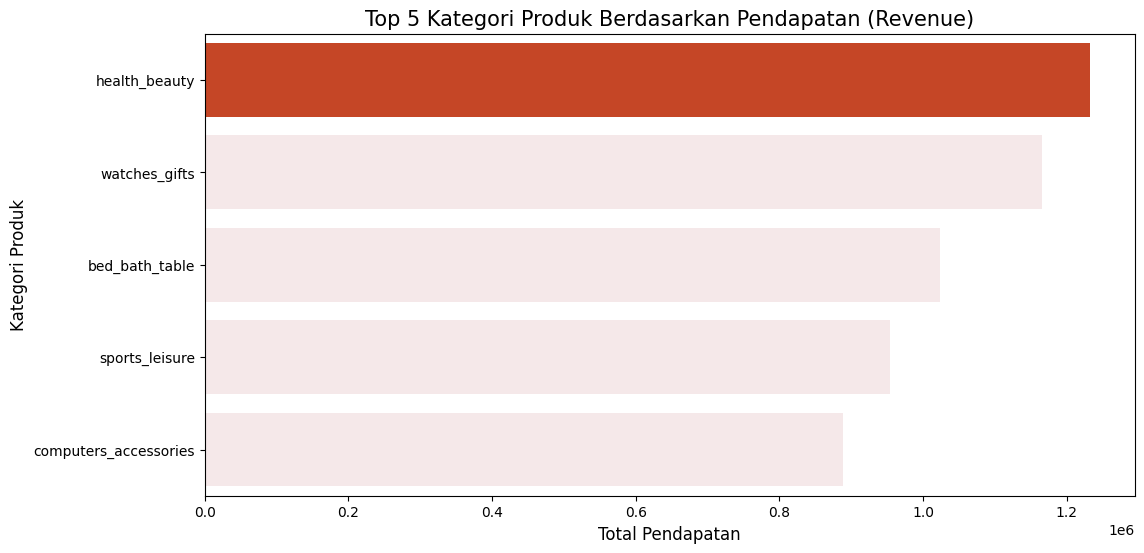

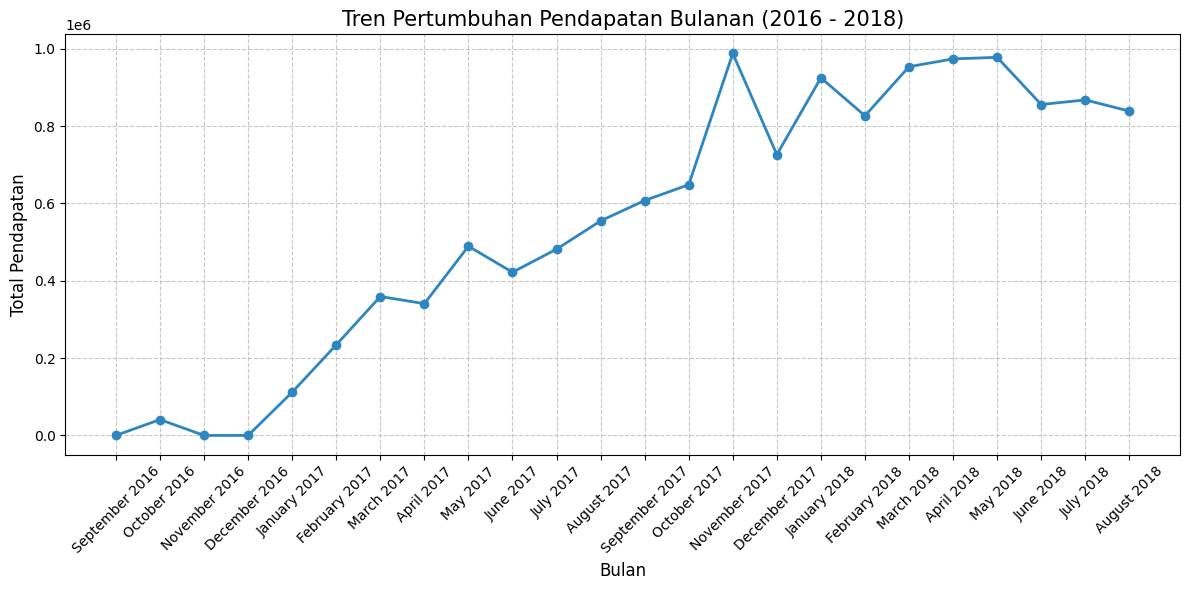

In [137]:
# Visualisasi Top 5 Kategori Pendapatan Tertinggi
plt.figure(figsize=(12, 6))

colors = ["#e0360b", "#f7e6e7", "#f7e6e7", "#f7e6e7", "#f7e6e7"]

top_category_df = category_revenue_df.head(5)
sns.barplot(
    x="price",
    y="product_category",
    data=top_category_df,
    palette=colors
)
plt.title("Top 5 Kategori Produk Berdasarkan Pendapatan (Revenue)", fontsize=15)
plt.xlabel("Total Pendapatan", fontsize=12)
plt.ylabel("Kategori Produk", fontsize=12)
plt.show()

# Visualisasi Tren Penjualan Bulanan
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_sales_df['order_purchase_timestamp'],
    monthly_sales_df['revenue'],
    marker='o',
    linewidth=2,
    color='#2E86C1'
)
plt.title("Tren Pertumbuhan Pendapatan Bulanan (2016 - 2018)", fontsize=15)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Pendapatan", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

/tmp/ipython-input-3427464259.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-3427464259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


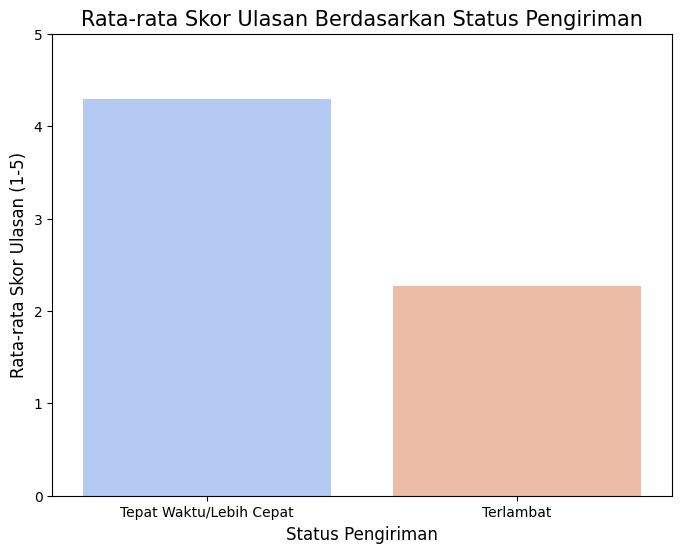

In [138]:
# Visualisasi Hubungan Ketepatan Waktu dengan Skor Ulasan
plt.figure(figsize=(8, 6))
sns.barplot(
    x="delivery_status",
    y="review_score",
    data=delivery_reviews_df,
    palette="coolwarm",
    ci=None # Menghilangkan error bar agar lebih bersih
)
plt.title("Rata-rata Skor Ulasan Berdasarkan Status Pengiriman", fontsize=15)
plt.xlabel("Status Pengiriman", fontsize=12)
plt.ylabel("Rata-rata Skor Ulasan (1-5)", fontsize=12)
plt.ylim(0, 5) # Memastikan skala sumbu Y mulai dari 0 sampai 5
plt.show()

**Insight:**
- Dominasi Kategori: Visualisasi Bar Chart menunjukkan adanya ketimpangan pendapatan antar kategori. Beberapa kategori "Top" menjadi penyumbang utama pemasukan perusahaan, yang mengindikasikan perlunya fokus stok dan pemasaran pada kategori tersebut.
- Sinyal Tren: Line Chart menunjukkan tren pertumbuhan yang sehat. Fluktuasi yang terlihat memberikan informasi berharga mengenai peak season (musim belanja) yang bisa digunakan untuk perencanaan kampanye di masa depan.
- Korelasi Kepuasan Pelanggan: Visualisasi perbandingan skor ulasan secara gamblang menunjukkan "hukuman" dari pelanggan terhadap keterlambatan. Penurunan skor yang drastis pada status "Terlambat" menegaskan bahwa ketepatan waktu adalah penentu utama customer loyalty di e-commerce ini.

## Analisa Lanjutan (RFM Analysis)

In [139]:
# Menetapkan tanggal referensi (biasanya H+1 dari tanggal transaksi terakhir di dataset)
recent_date = orders_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

rfm_df = product_sales_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": lambda x: (recent_date - x.max()).days, # Recency
    "order_id": "nunique", # Frequency
    "price": "sum" # Monetary
})

# Menamai kolom agar lebih jelas
rfm_df.columns = ["customer_id", "recency", "frequency", "monetary"]

print(rfm_df.head())

                        customer_id  recency  frequency  monetary
0  00012a2ce6f8dcda20d059ce98491703      288          1     89.80
1  000161a058600d5901f007fab4c27140      410          1     54.90
2  0001fd6190edaaf884bcaf3d49edf079      548          1    179.99
3  0002414f95344307404f0ace7a26f1d5      379          1    149.90
4  000379cdec625522490c315e70c7a9fb      150          1     93.00


/tmp/ipython-input-826113060.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
/tmp/ipython-input-826113060.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
/tmp/ipython-input-826113060.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="

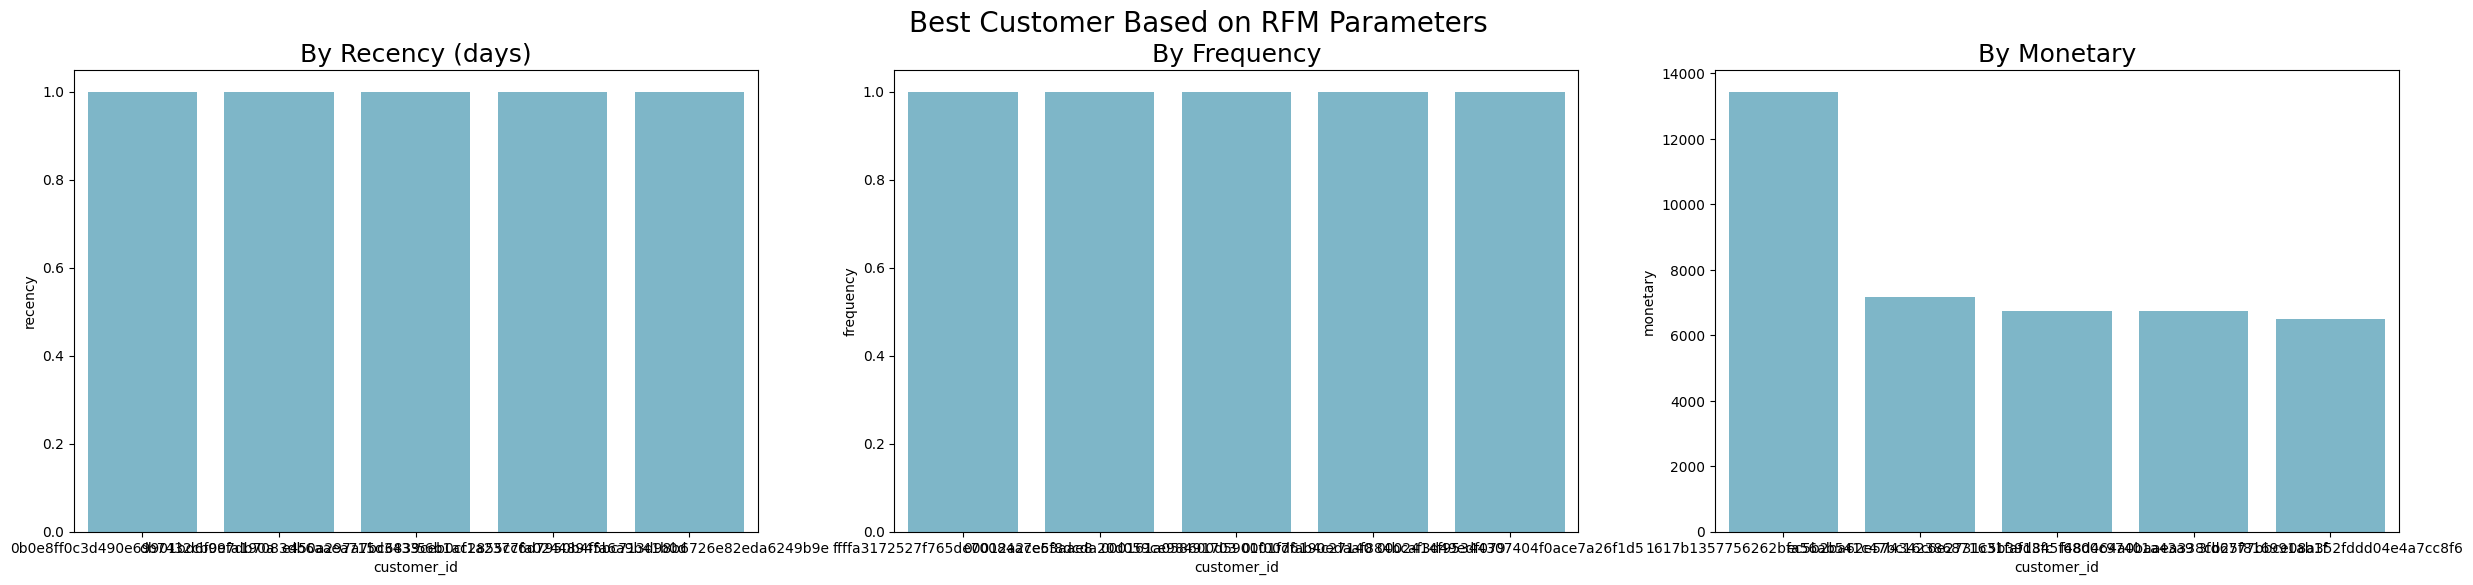

In [143]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Berdasarkan Recency
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)

# Berdasarkan Frequency
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_title("By Frequency", loc="center", fontsize=18)

# Berdasarkan Monetary
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_title("By Monetary", loc="center", fontsize=18)

plt.suptitle("Best Customer Based on RFM Parameters", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1 :

Berdasarkan visualisasi, kategori produk seperti "health_beauty", "watches_gifts", dan "bed_bath_table" mendominasi pendapatan tertinggi. Hal ini menunjukkan bahwa kategori produk gaya hidup dan kebutuhan rumah tangga memiliki nilai transaksi yang besar di platform ini.

Grafik Line Chart juga menunjukkan bahwa tren penjualan secara umum mengalami kenaikan yang signifikan sejak akhir 2016 hingga pertengahan 2018. Meskipun terdapat fluktuasi bulanan, arah tren yang menanjak menandakan basis pelanggan dan volume transaksi e-commerce ini tumbuh secara konsisten.

- Conclution pertanyaan 2 :

Visualisasi menunjukkan perbedaan rata-rata skor ulasan yang sangat kontras antara pengiriman yang Tepat Waktu/Lebih Cepat dibandingkan dengan yang Terlambat.

Pelanggan cenderung memberikan rating tinggi (4-5 bintang) ketika pesanan sampai sebelum atau sesuai estimasi. Sebaliknya, rata-rata skor ulasan turun drastis pada pesanan yang terlambat. Ini membuktikan bahwa logistik dan kecepatan pengiriman merupakan faktor kunci dalam menjaga tingkat kepuasan pelanggan di pasar e-commerce ini.


## Eksport Dataset untuk Dashboard

In [140]:
product_sales_df.to_csv('/content/drive/My Drive/ColabNotebooks/E-Commerce Public Dataset/product_sales.csv', index=False)

In [141]:
delivery_reviews_df.to_csv('/content/drive/My Drive/ColabNotebooks/E-Commerce Public Dataset/delivery_reviews.csv', index=False)

In [142]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.3
aiosignal==1.4.0
aiosqlite==0.22.1
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.18.3
altair==5.5.0
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.1
anywidget==0.9.21
apsw==3.51.2.0
apswutils==0.1.2
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2026.2.2.0.48.1
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.18.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.33.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==4.0.0
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==7.0.0
catalogue==2.0.10
certifi==2026.1.4
cffi